In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/E-wang42/ML-Capstone/refs/heads/main/data/Debernardi%20et%20al%202020%20data.csv")

## EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample_id                590 non-null    object 
 1   patient_cohort           590 non-null    object 
 2   sample_origin            590 non-null    object 
 3   age                      590 non-null    int64  
 4   sex                      590 non-null    object 
 5   diagnosis                590 non-null    int64  
 6   stage                    199 non-null    object 
 7   benign_sample_diagnosis  208 non-null    object 
 8   plasma_CA19_9            350 non-null    float64
 9   creatinine               590 non-null    float64
 10  LYVE1                    590 non-null    float64
 11  REG1B                    590 non-null    float64
 12  TFF1                     590 non-null    float64
 13  REG1A                    306 non-null    float64
dtypes: float64(6), int64(2), o

In [ ]:
df.describe()

,age,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
count,590.000000,590.000000,350.000000,590.000000,590.000000,590.000000,590.000000,306.000000
mean,59.079661,2.027119,654.002944,0.855383,3.063530,111.774090,597.868722,735.281222
std,13.109520,0.804873,2430.317642,0.639028,3.438796,196.267110,1010.477245,1477.247724
min,26.000000,1.000000,0.000000,0.056550,0.000129,0.001104,0.005293,0.000000
25%,50.000000,1.000000,8.000000,0.373230,0.167179,10.757216,43.961000,80.692000
50%,60.000000,2.000000,26.500000,0.723840,1.649862,34.303353,259.873974,208.538500
75%,69.000000,3.000000,294.000000,1.139482,5.205037,122.741013,742.736000,649.000000
max,89.000000,3.000000,31000.000000,4.116840,23.890323,1403.897600,13344.300000,13200.000000


## Clean Data

In [ ]:
df = df.drop(["sample_id", "stage", "benign_sample_diagnosis", "sample_origin", "patient_cohort"], axis=1)

In [ ]:
df.head()

,age,sex,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,33,F,1,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,81,F,1,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,51,M,1,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,61,M,1,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,62,M,1,9.0,0.21489,0.000860,65.54000,41.088000,NaN


In [ ]:
df.isnull().any()

,0
age,False
sex,False
diagnosis,False
plasma_CA19_9,True
creatinine,False
LYVE1,False
REG1B,False
TFF1,False
REG1A,True


In [ ]:
df['REG1A'] = df['REG1A'].fillna(value = np.nanmedian(df["REG1A"])) #fill null values for REG1A column with median values

In [ ]:
df["plasma_CA19_9"] = df.plasma_CA19_9.fillna(value = np.nanmedian(df.plasma_CA19_9)) #fill null values for plasma_CA19_9 column with median values

<Axes: >

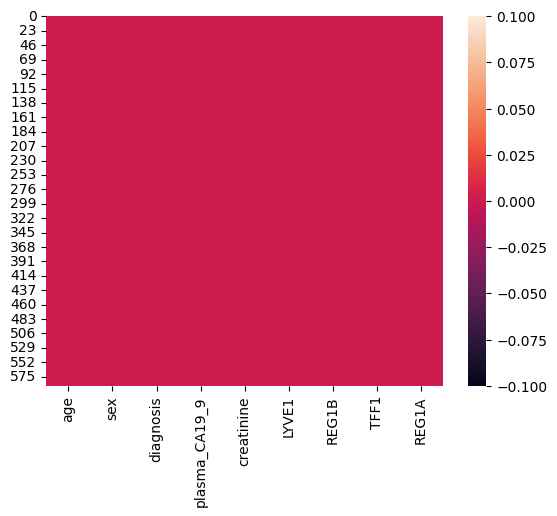

In [ ]:
sns.heatmap(df.isnull()) #null check

In [ ]:
df.drop_duplicates() # drops duplicates if there are any

,age,sex,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,33,F,1,11.7,1.83222,0.893219,52.948840,654.282174,1262.0000
1,81,F,1,26.5,0.97266,2.037585,94.467030,209.488250,228.4070
2,51,M,1,7.0,0.78039,0.145589,102.366000,461.141000,208.5385
3,61,M,1,8.0,0.70122,0.002805,60.579000,142.950000,208.5385
4,62,M,1,9.0,0.21489,0.000860,65.540000,41.088000,208.5385
...,...,...,...,...,...,...,...,...,...
585,68,M,3,26.5,0.52026,7.058209,156.241000,525.178000,208.5385
586,71,F,3,26.5,0.85956,8.341207,16.915000,245.947000,208.5385
587,63,M,3,26.5,1.36851,7.674707,289.701000,537.286000,208.5385
588,75,F,3,26.5,1.33458,8.206777,205.930000,722.523000,208.5385


## Preprocessing

In [ ]:
df.diagnosis = [1 if value==3 else 0 for value in df.diagnosis] #convert to binary values

In [ ]:
y = df["diagnosis"]
x = df.drop(['diagnosis', 'sex'], axis=1)

In [ ]:
scaler = StandardScaler() # scaler object
x_scaled = scaler.fit_transform(x) # fit to and transform data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.30, random_state=42)

## Training

In [ ]:
# LR model
lr = LogisticRegression()

# train
lr.fit(x_train, y_train)

# predict target
y_pred = lr.predict(x_test)

## Evaluation

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.86


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       125
           1       0.76      0.79      0.77        52

    accuracy                           0.86       177
   macro avg       0.83      0.84      0.84       177
weighted avg       0.87      0.86      0.87       177



## Visualization

In [ ]:
categorical_cols = ['sex', 'diagnosis']
numerical_cols = ['age', 'plasma_CA19_9', 'creatinine', 'LYVE1', 'REG1B', 'TFF1', 'REG1A']

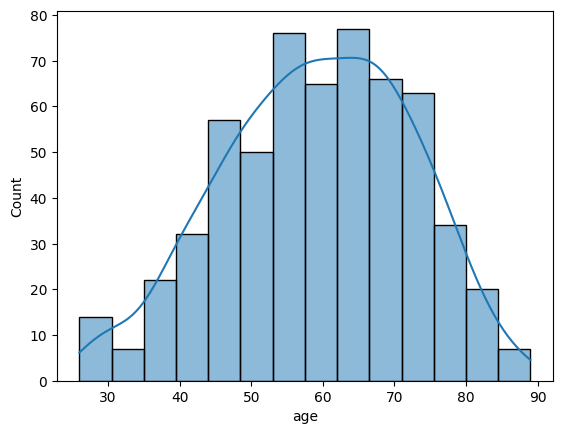

In [ ]:
sns.histplot(df.age, kde=True)
plt.show()

<Axes: xlabel='diagnosis', ylabel='age'>

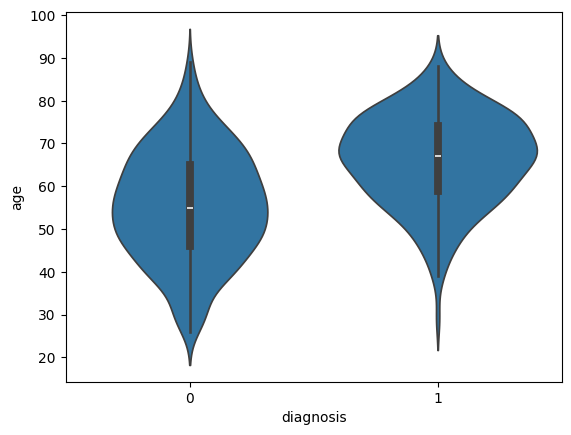

In [ ]:
sns.violinplot(x=df['diagnosis'], y = df.age)

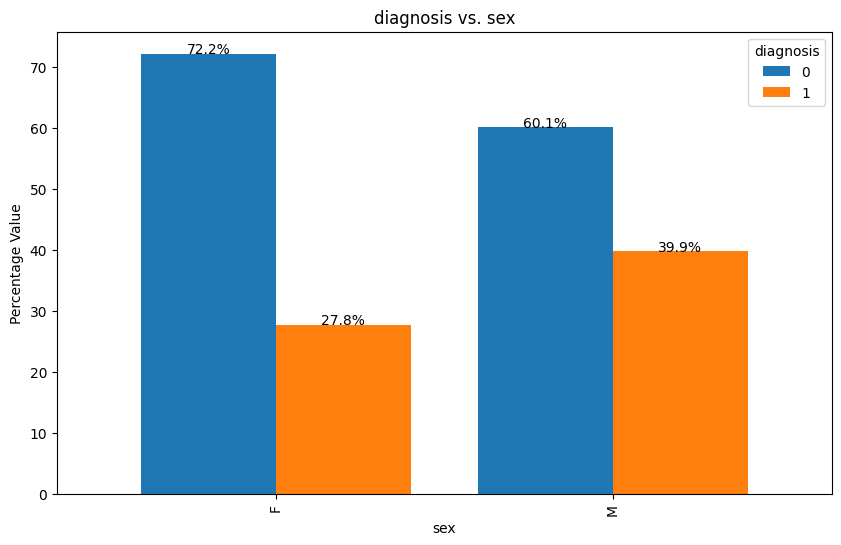

In [ ]:
#group by 'sex' and 'diagnosis' and calculates count
grouped = df.groupby(['sex', 'diagnosis']).size().unstack(fill_value=0)

#calculate percentage
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

#create bar plot
ax = grouped_percentage.plot(kind="bar", figsize=(10,6), width=0.8)

#add labels
plt.xlabel('sex')
plt.ylabel('Percentage Value')
plt.title('diagnosis vs. sex')

#add percentage values above bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height), ha='center')

#add legend
plt.legend(title='diagnosis', labels = df.diagnosis.value_counts().index)

#display plot
plt.show()

<Axes: >

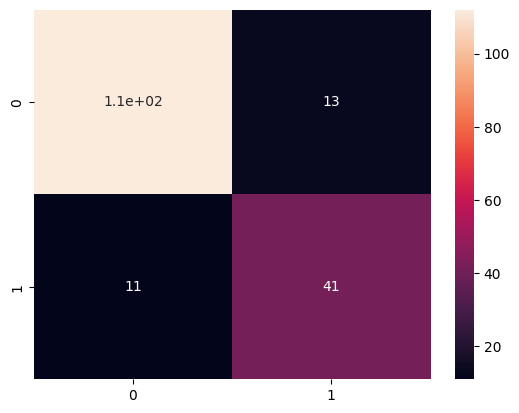

In [ ]:
#confusion matrix for LR model
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

<Axes: >

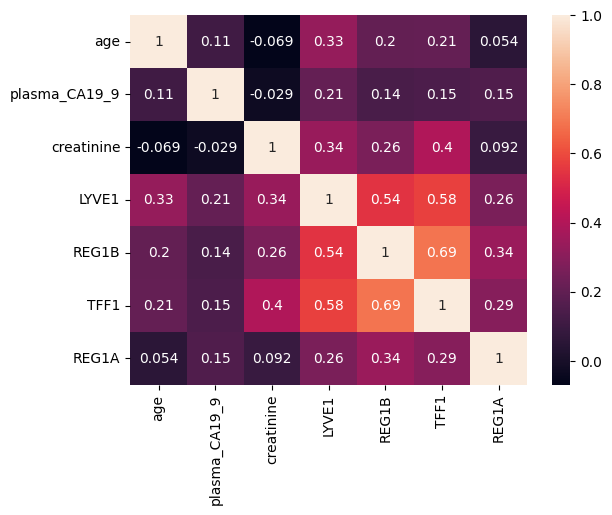

In [ ]:
#correlation heatmap
sns.heatmap(df[numerical_cols].corr(), annot=True)

## Data Tool

In [ ]:
# Define the feature names for scaler
feature_names = ['age', 'plasma_CA19_9', 'creatinine', 'LYVE1', 'REG1B', 'TFF1', 'REG1A']

# Define widget for user input
def predict_cancer(age, plasma_CA19_9, creatinine, LYVE1, REG1B, TFF1, REG1A):
    input_data = pd.DataFrame([[age, plasma_CA19_9, creatinine, LYVE1, REG1B, TFF1, REG1A]], columns=feature_names)

    # Scale the input data
    input_data_scaled = scaler.transform(input_data)

    # Prediction model using logistic regression
    prediction_prob = lr.predict_proba(input_data_scaled)

    # Display the prediction result with probabilities
    print(f"Prediction Probabilities (Negative, Positive): {prediction_prob[0]}")

    # Adjusting threshold for sensitivity and printing results
    if prediction_prob[0][1] >= 0.4:
        print("Prediction: Positive for Pancreatic Cancer")
    else:
        print("Prediction: Negative for Pancreatic Cancer")

# Create inputs for biomarkers
age_widget = widgets.FloatText(value=50, description='Age:')
plasma_CA19_9_widget = widgets.FloatText(value=20.0, description='CA19_9:')
creatinine_widget = widgets.FloatText(value=1.0, description='Creatinine:')
LYVE1_widget = widgets.FloatText(value=0.5, description='LYVE1:')
REG1B_widget = widgets.FloatText(value=0.5, description='REG1B:')
TFF1_widget = widgets.FloatText(value=0.5, description='TFF1:')
REG1A_widget = widgets.FloatText(value=0.5, description='REG1A:')
predict_button = widgets.Button(description="Predict Cancer")

# Set up event handling for button
def on_button_click(b):
    age = age_widget.value
    plasma_CA19_9 = plasma_CA19_9_widget.value
    creatinine = creatinine_widget.value
    LYVE1 = LYVE1_widget.value
    REG1B = REG1B_widget.value
    TFF1 = TFF1_widget.value
    REG1A = REG1A_widget.value
    predict_cancer(age, plasma_CA19_9, creatinine, LYVE1, REG1B, TFF1, REG1A)

predict_button.on_click(on_button_click)

# Display widgets for input
display(age_widget, plasma_CA19_9_widget, creatinine_widget, LYVE1_widget, REG1B_widget, TFF1_widget, REG1A_widget, predict_button)


FloatText(value=50.0, description='Age:')

FloatText(value=20.0, description='CA19_9:')

FloatText(value=1.0, description='Creatinine:')

FloatText(value=0.5, description='LYVE1:')

FloatText(value=0.5, description='REG1B:')

FloatText(value=0.5, description='TFF1:')

FloatText(value=0.5, description='REG1A:')

Button(description='Predict Cancer', style=ButtonStyle())

Prediction Probabilities (Negative, Positive): [0.9422168 0.0577832]
Prediction: Negative for Pancreatic Cancer
Prediction Probabilities (Negative, Positive): [0.14139237 0.85860763]
Prediction: Positive for Pancreatic Cancer
Prediction Probabilities (Negative, Positive): [0.14139237 0.85860763]
Prediction: Positive for Pancreatic Cancer
Prediction Probabilities (Negative, Positive): [0.085132 0.914868]
Prediction: Positive for Pancreatic Cancer
